# Построение гистограмм

Подключение библиотек

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, kendalltau
from sklearn.metrics import mean_absolute_error

Чтение таблицы из файла с помощью pandas

In [63]:
file_path = "D:\\AI\\HIstogram\\dataset_mental_report_new.xlsx"
data = pd.read_excel(file_path)

Вывод таблицы

In [64]:
data

,Unnamed: 0,num,marker_data_id,apway_id,context,person,gender,old,old_group,stroop_duration,mono_t,mono_dt,mono_err,color_t,color_dt,color_err,true_text_t,true_text_dt,true_text_err,true_color_t,true_color_dt,true_color_err,P_edit,RR_avg,RR_dev,HR_avg,VLF_avg,VLF_dev,LF_avg,LF_dev,HF_avg,HF_dev,TP_avg,TP_dev,LF_HF_avg,LF_HF_dev,SDNN,SI,M0,AM0,MxDMn,pNN50,HF_per,FR,SN,Q1,Q2,Q3,Q4,Q_common,adapt_risk,Q_edit
0,0,1,65787,1220_11316,Sofia,201,М,35,22_35,268,1866,518,2,1583,220,0,2406,705,0,2343,1034,1,0.61,883,46,68,384.85,133.43,2394.49,824.92,653.48,168.35,3432.83,1036.71,3.58,0.9743,60.842,60.66,0.87,36.24,0.35,17.41,23.18,2.49,-1.03,100.0,0.0,0.0,0.0,Q1,1,0
1,1,2,65810,1226_11325,Sofia,105,М,56,36_60,836,9476,4628,0,4900,2030,1,7037,2509,3,5596,2450,3,0.90,946,20,63,112.93,67.44,54.12,18.57,168.66,57.17,335.71,110.80,0.36,0.1269,26.790,260.80,0.94,64.83,0.14,11.15,74.89,0.47,1.74,0.0,78.4,21.6,0.0,Q2,6,0
2,2,3,66190,1242_11509,Sofia,106,М,60,36_60,602,5418,3278,3,5059,4209,0,3477,1993,0,5623,3059,1,3.92,787,19,76,90.08,44.09,143.31,66.38,51.83,29.41,285.22,110.77,4.63,3.2178,23.833,336.12,0.78,63.54,0.13,3.11,26.65,-0.03,0.85,2.0,62.7,33.3,2.0,Q3,6,0
3,3,4,66519,1258_11745,Sofia,001test,Ж,23,22_35,136,1034,170,0,904,89,0,1135,210,0,973,115,0,0.00,615,32,99,156.94,25.49,297.19,95.22,16.60,2.74,470.74,93.69,18.04,4.3015,42.884,367.40,0.62,62.71,0.14,0.00,5.84,-0.42,0.65,0.0,50.0,50.0,0.0,Q3,7,0
4,4,5,66555,1256_11772,Sofia,107,Ж,77,60_PLUS,472,2058,523,0,2208,797,0,4203,1912,1,6945,4271,8,1.81,873,21,69,64.46,34.60,59.15,28.19,137.66,45.09,261.27,78.03,0.53,0.3806,27.252,236.67,0.87,62.13,0.15,8.13,70.93,0.66,2.08,0.0,100.0,0.0,0.0,Q2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,414,417,264116,5645_46265,1,eka4,Ж,60,36_60,253,1904,624,0,1499,355,0,1645,347,1,2512,761,7,0.59,805,20,75,125.41,63.57,243.12,93.59,105.09,24.38,473.63,96.29,2.49,1.1736,25.306,292.22,0.81,63.51,0.14,0.00,33.03,0.36,1.56,0.0,68.8,31.2,0.0,Q2,6,0
415,415,418,264139,5623_46271,1,eka,Ж,29,22_35,139,973,137,1,935,176,0,1323,312,3,1225,382,3,0.41,667,22,90,107.84,77.91,124.52,9.14,35.64,8.25,268.00,83.10,3.77,0.9480,28.821,380.55,0.68,68.46,0.14,0.34,22.11,-0.55,1.18,0.0,25.0,75.0,0.0,Q3,7,0
416,416,419,264233,5642_46347,1,eka3,Ж,45,36_60,236,1238,264,0,1164,239,0,2200,1302,0,2380,796,1,0.00,765,30,79,611.88,252.43,295.44,79.75,53.98,14.40,961.30,325.82,5.49,0.6866,36.523,201.50,0.77,48.18,0.16,0.50,15.65,1.24,0.88,0.0,100.0,0.0,0.0,Q2,5,0
417,417,420,264269,5623_46352,1,eka,Ж,29,22_35,128,906,249,1,925,206,2,1128,206,0,1096,283,2,0.00,805,27,74,149.01,43.08,490.46,92.35,224.21,23.41,863.68,88.34,2.17,0.2327,33.730,217.04,0.82,57.30,0.16,6.75,31.79,1.02,0.67,0.0,100.0,0.0,0.0,Q2,5,0


Выбор только нужных данных

In [65]:
necessary = data[['gender','old']]
necessary.head()

,gender,old
0,М,35
1,М,56
2,М,60
3,Ж,23
4,Ж,77


Фильтрация данных и разделение по полу.(pandas)

In [66]:
men = necessary[necessary['gender']=='М']['old']
women = necessary[necessary['gender']=='Ж']['old']

Создание графиков (matplotlib)

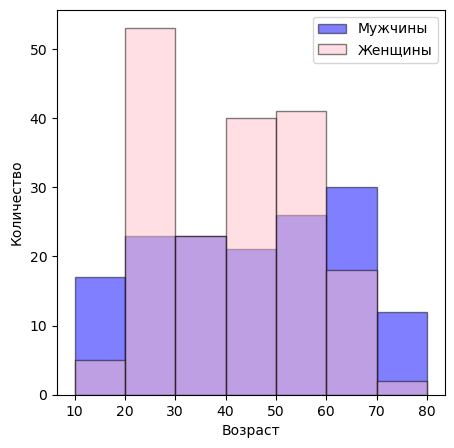

In [67]:
plt.figure(figsize=(5,5))
bins=[10, 20, 30, 40, 50, 60, 70, 80]
plt.hist(men, bins=bins, alpha=0.5, label='Мужчины', color='blue', edgecolor='black')
#edgecolor- обводка столбцов bins- интервалы alpha- прозрачность
plt.hist(women, bins=bins, alpha=0.5, label='Женщины', color='pink', edgecolor='black')
plt.xlabel('Возраст')  
plt.ylabel('Количество')  
plt.legend(loc='upper right')  # Легенда


Построение графиков kdeplot(график плотности распределения) для мужчин и женщин
с помощью seaborn

<Axes: xlabel='old', ylabel='Density'>

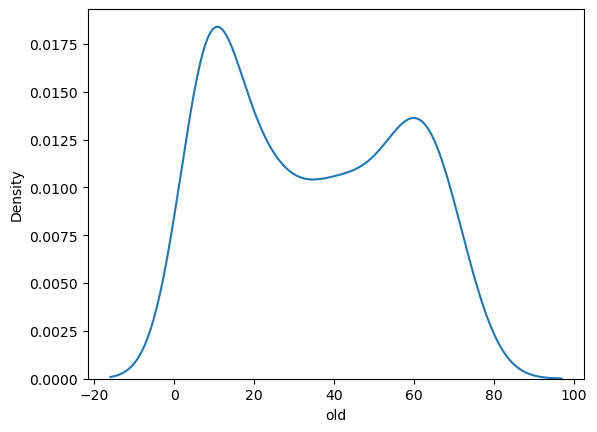

In [68]:
sns.kdeplot(men)

<Axes: xlabel='old', ylabel='Density'>

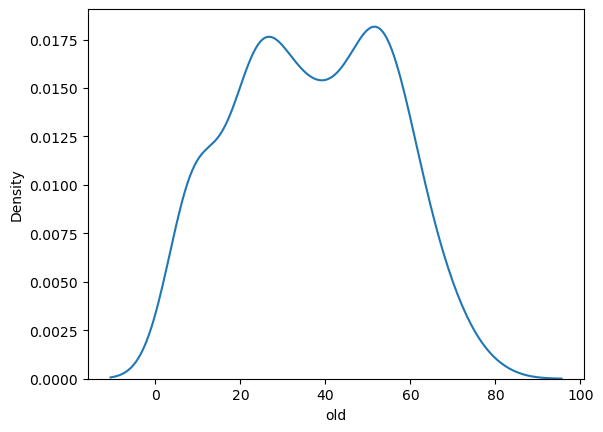

In [69]:
sns.kdeplot(women)

Построение графиков связи возраста с другими показателями

C:\Users\kirya\AppData\Local\Temp\ipykernel_8932\643999503.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,5))


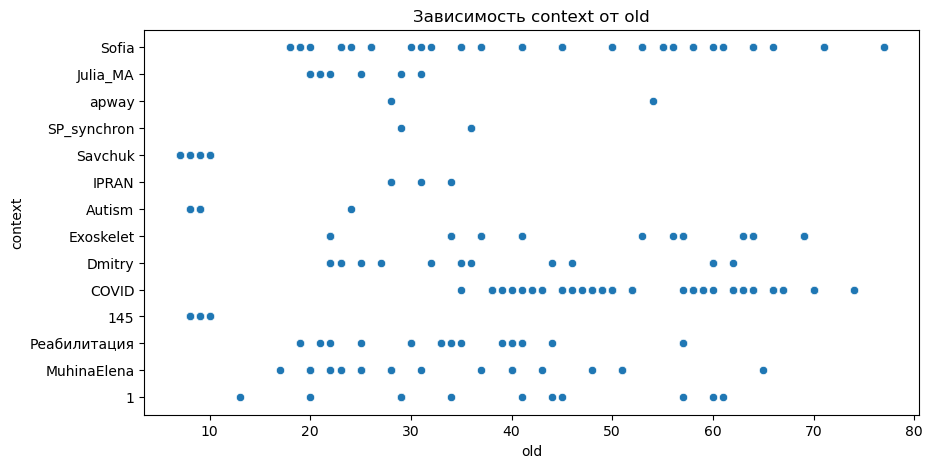

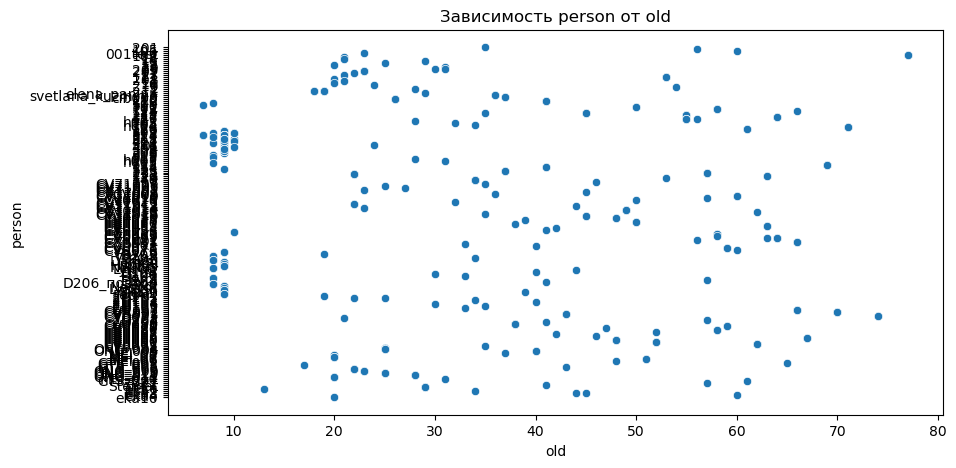

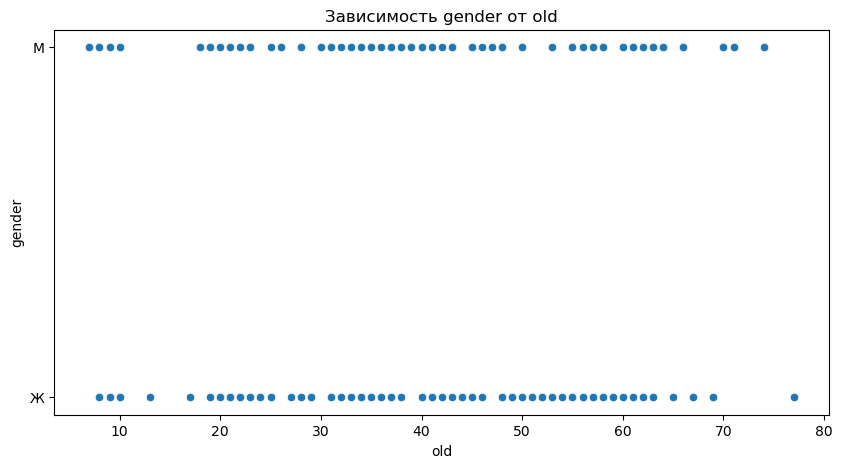

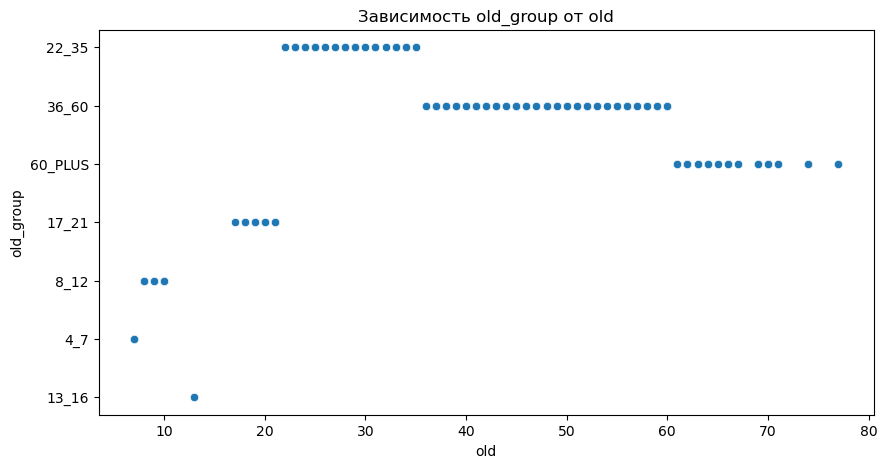

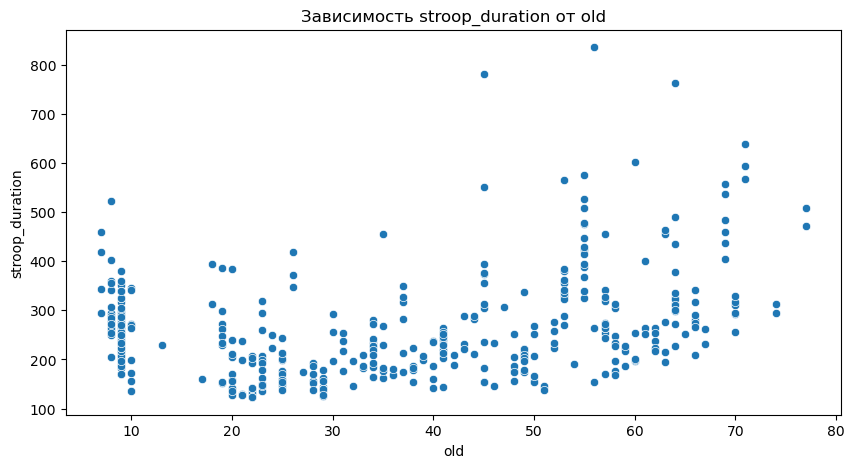

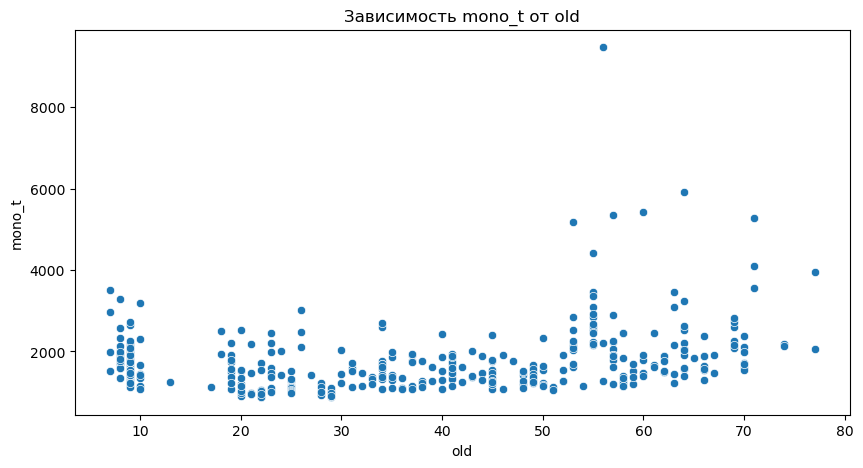

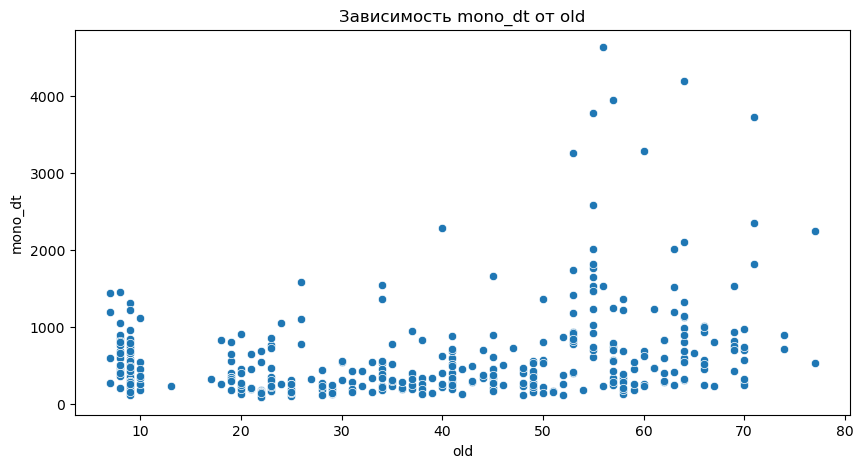

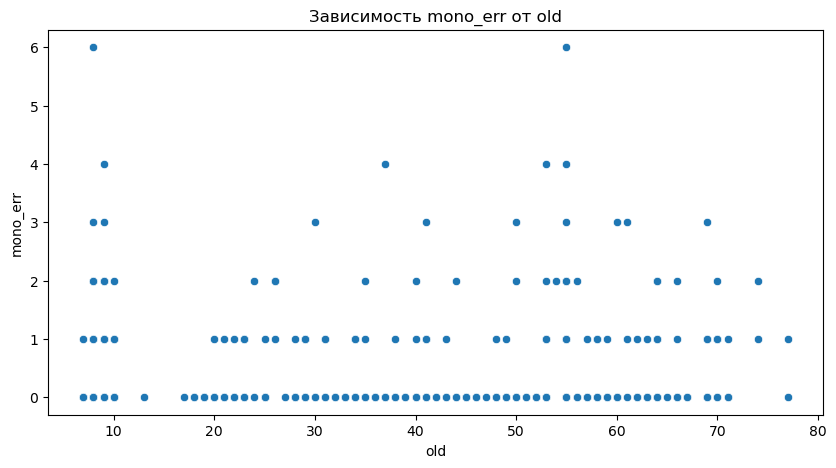

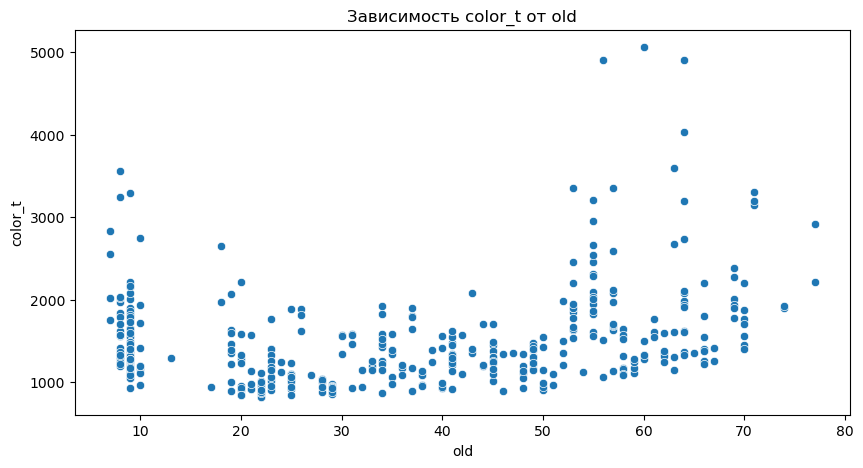

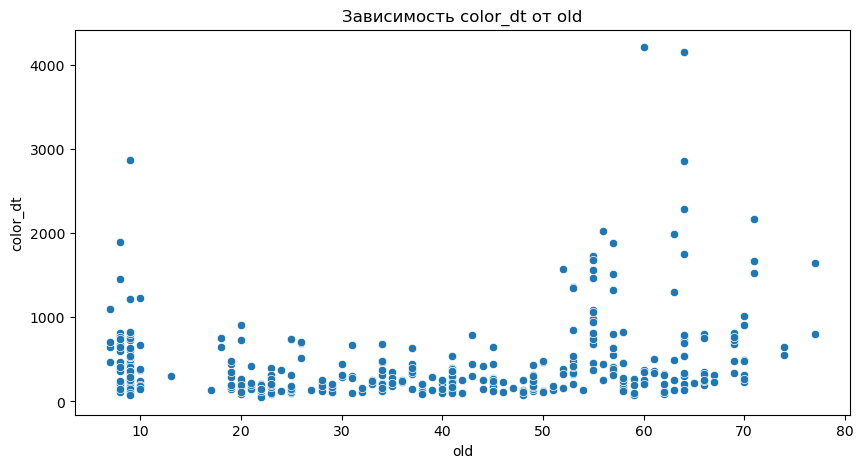

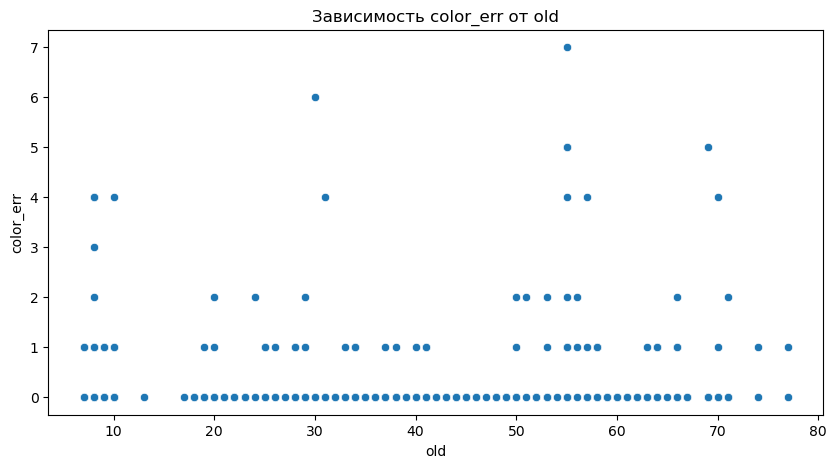

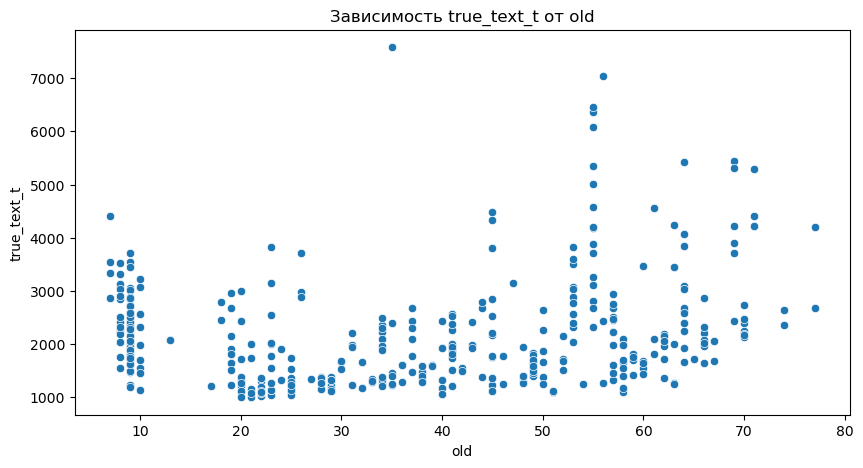

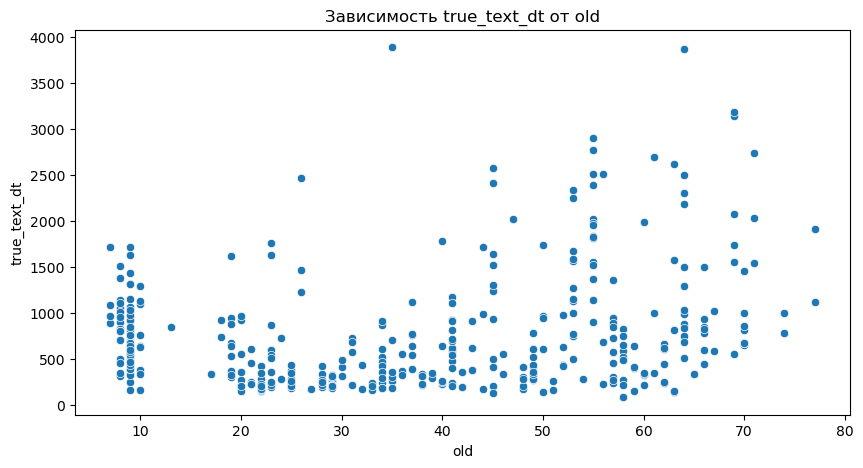

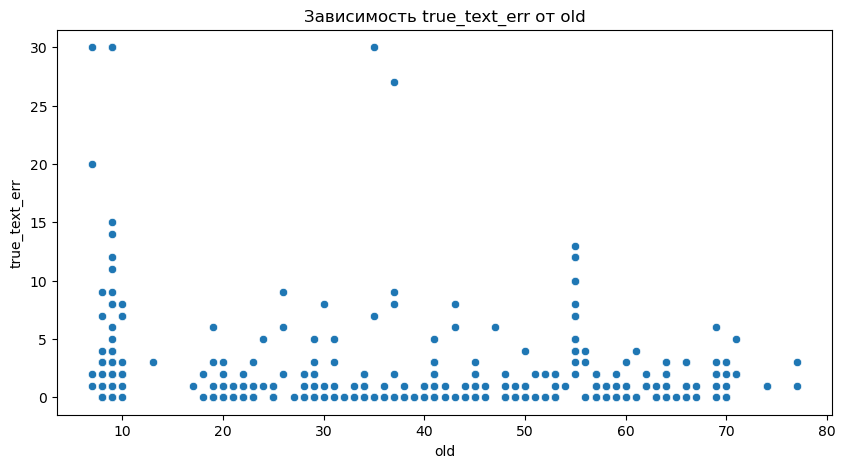

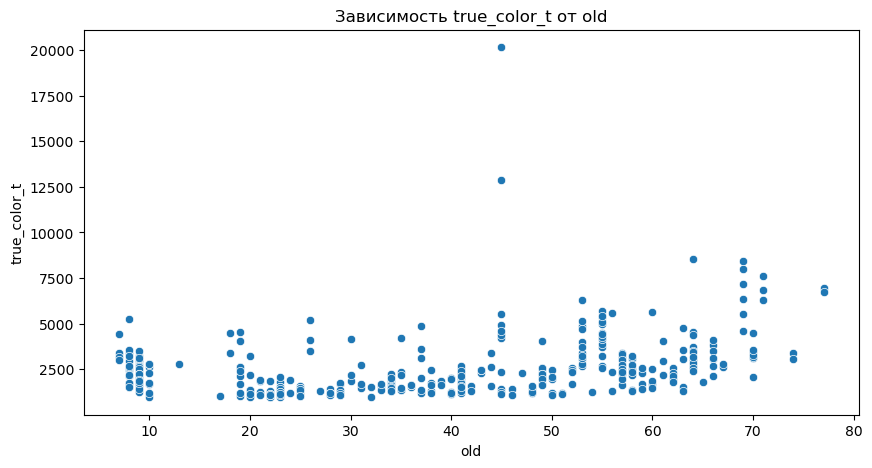

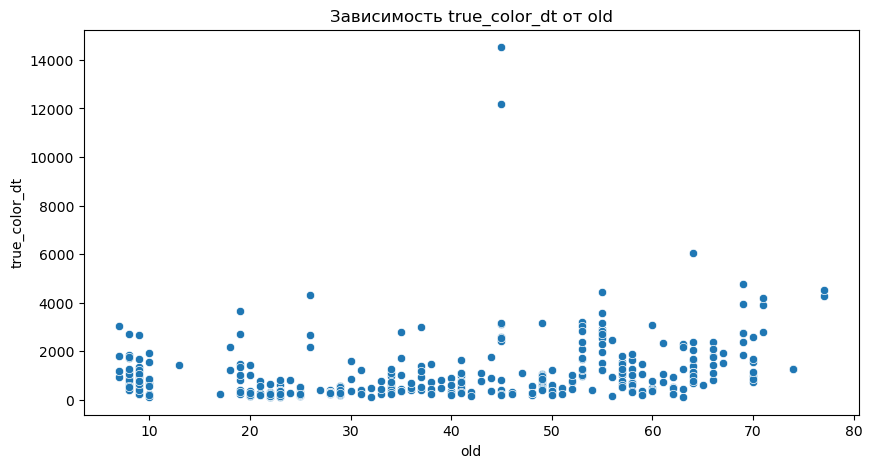

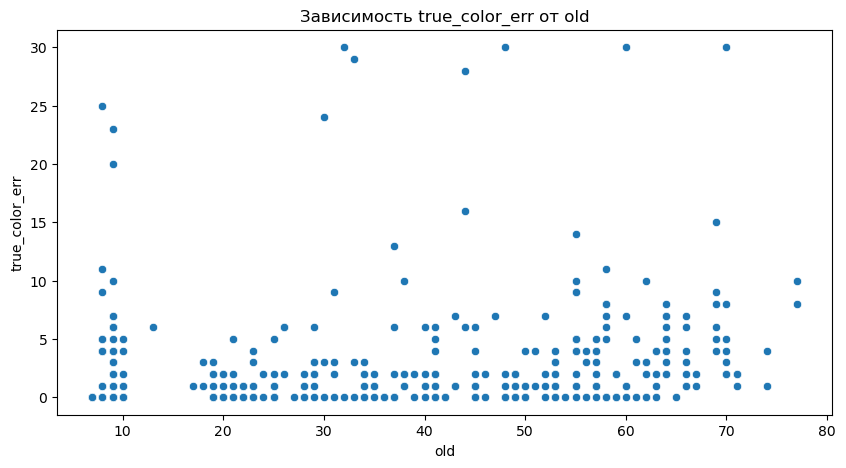

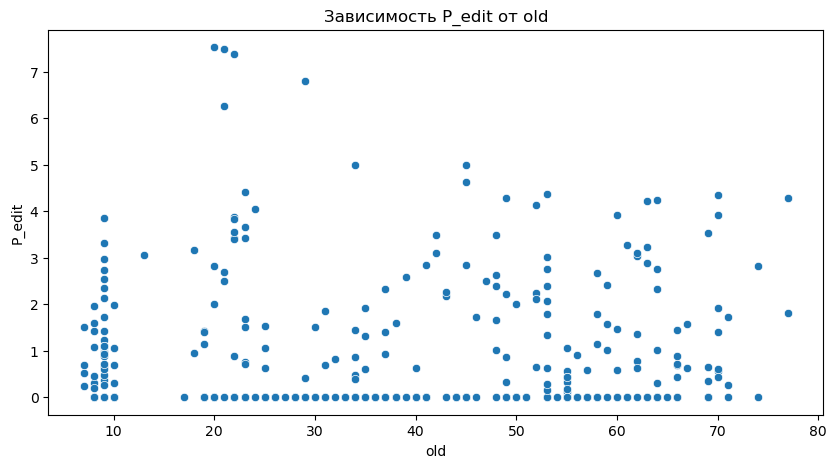

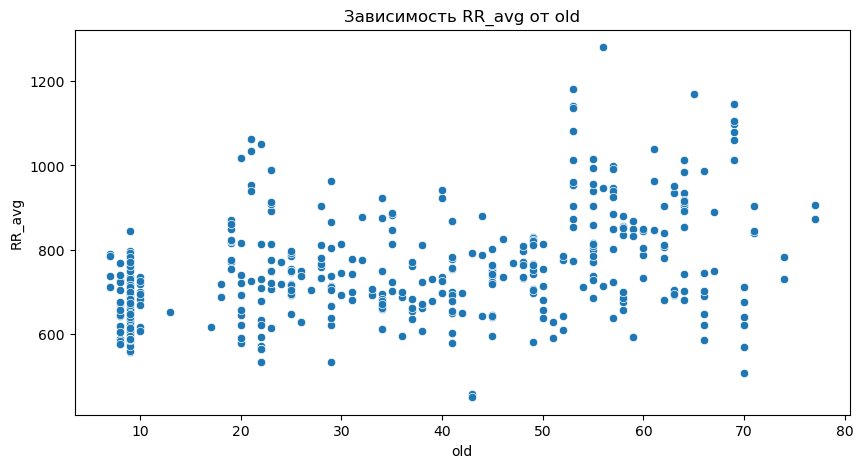

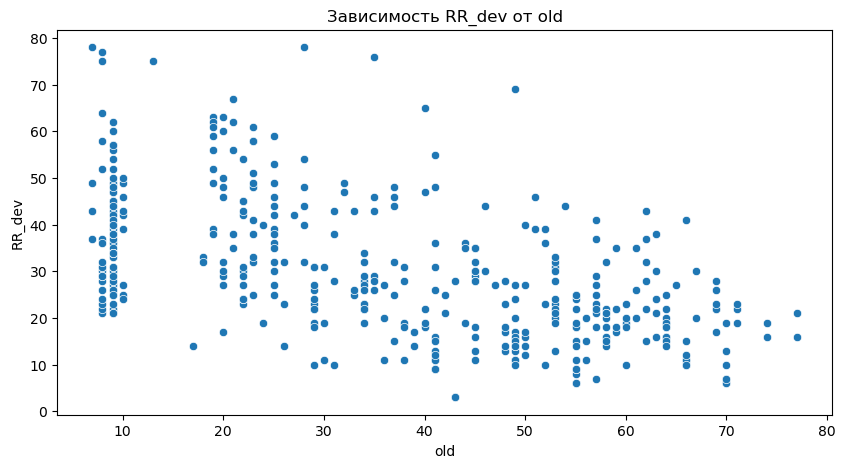

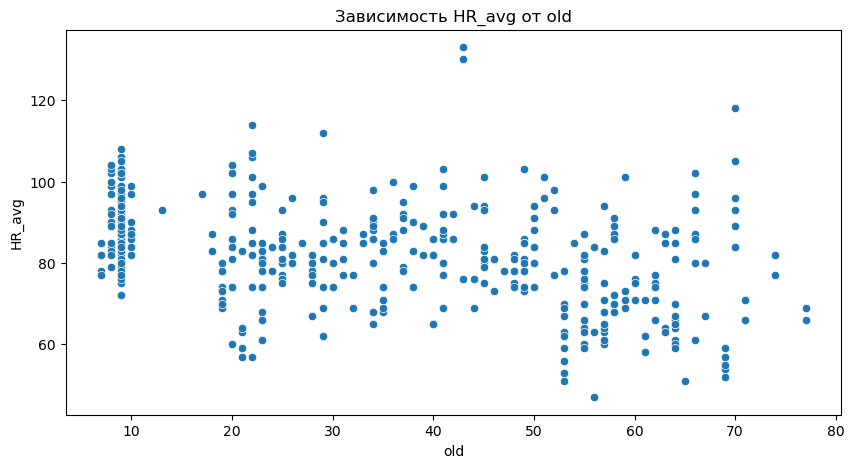

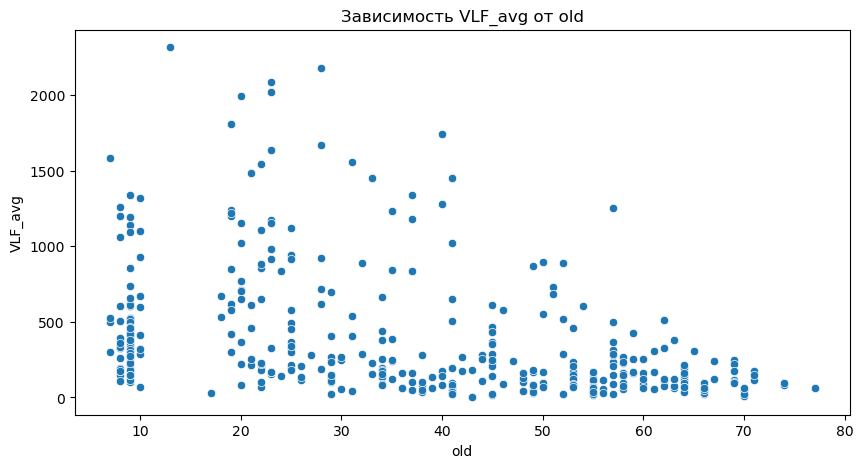

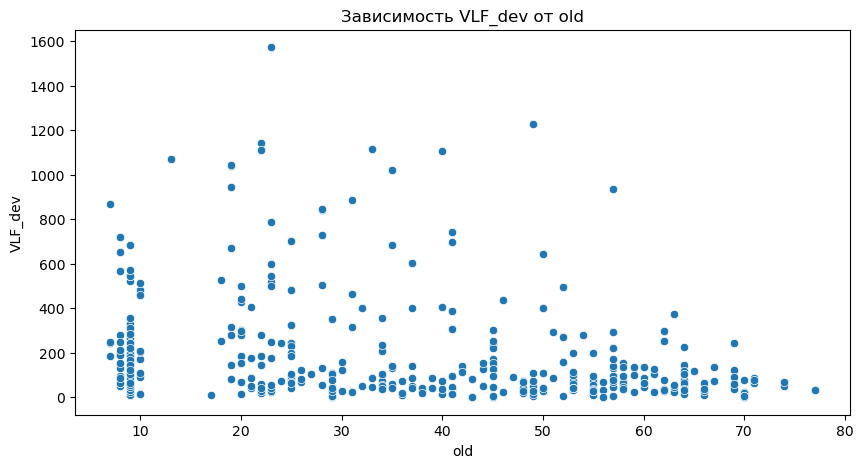

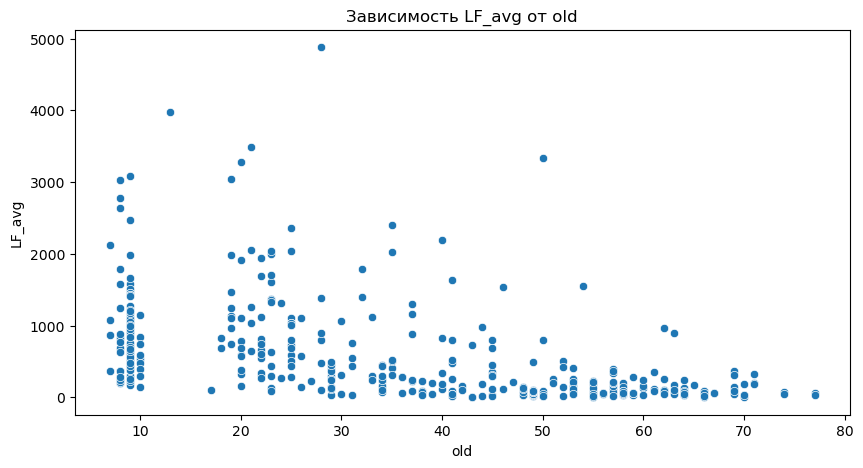

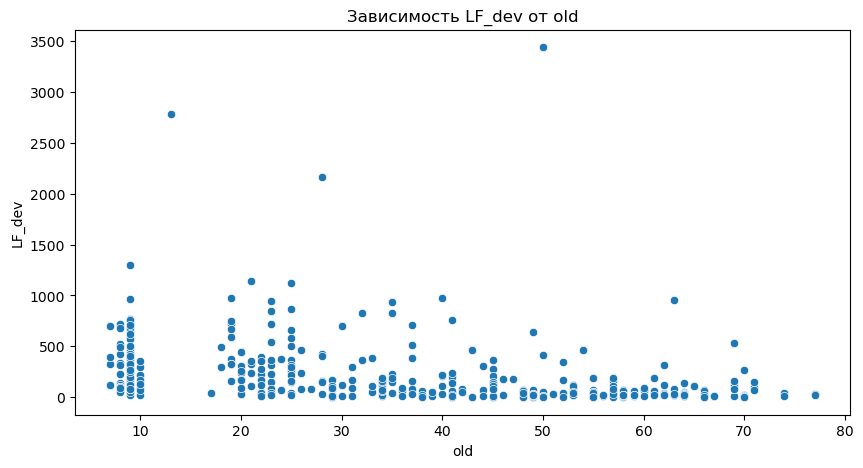

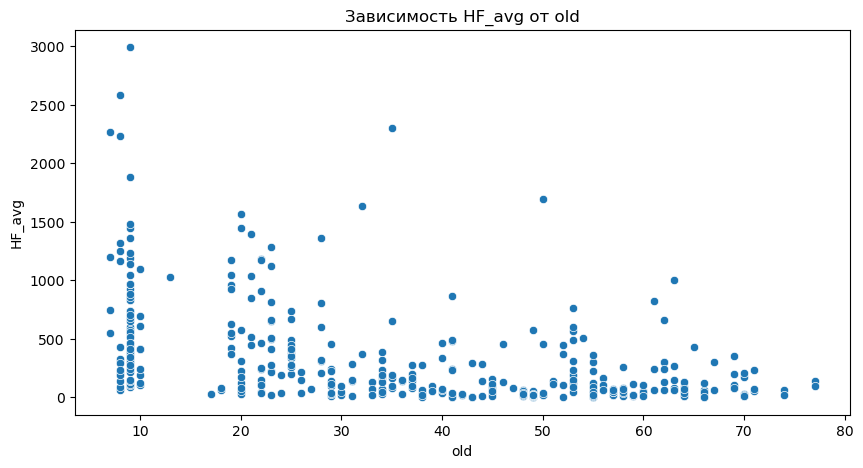

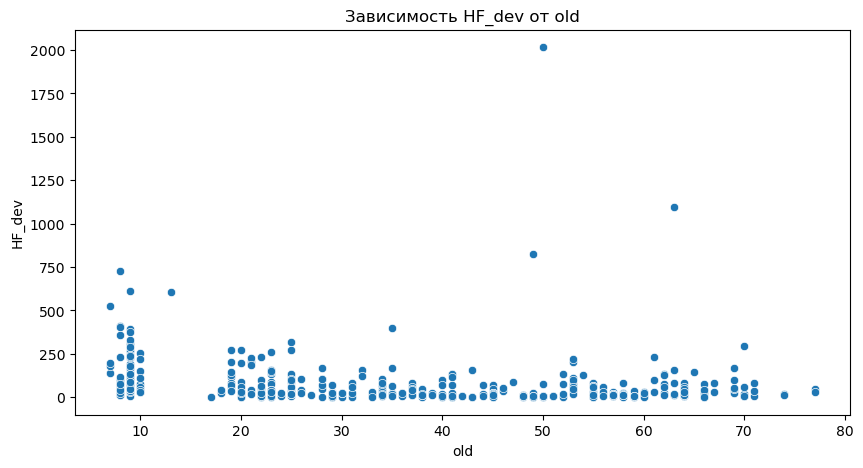

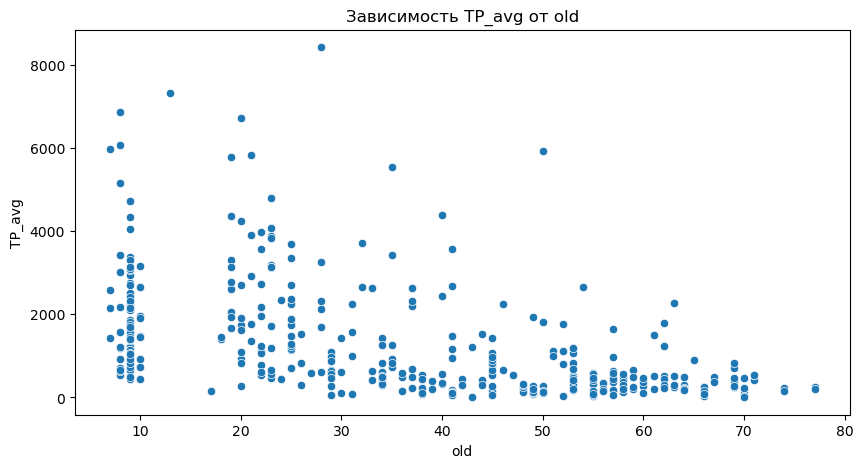

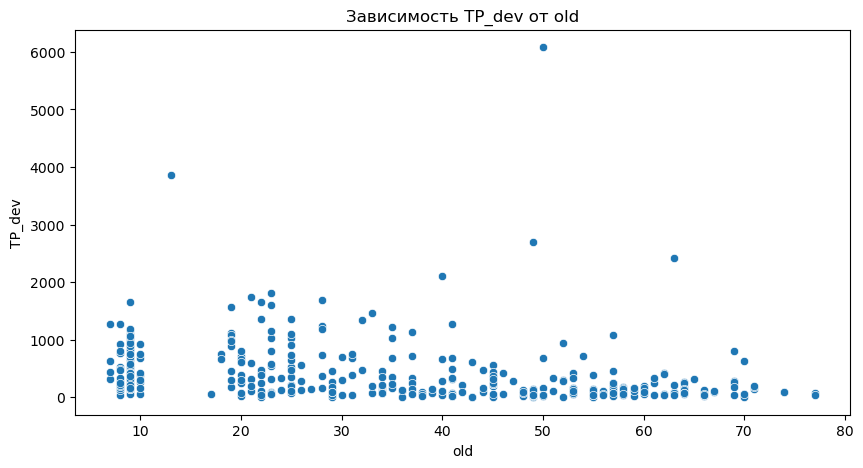

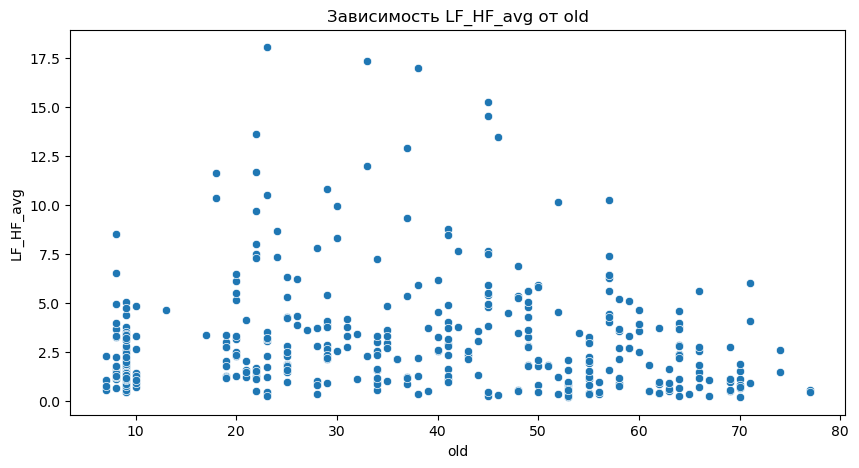

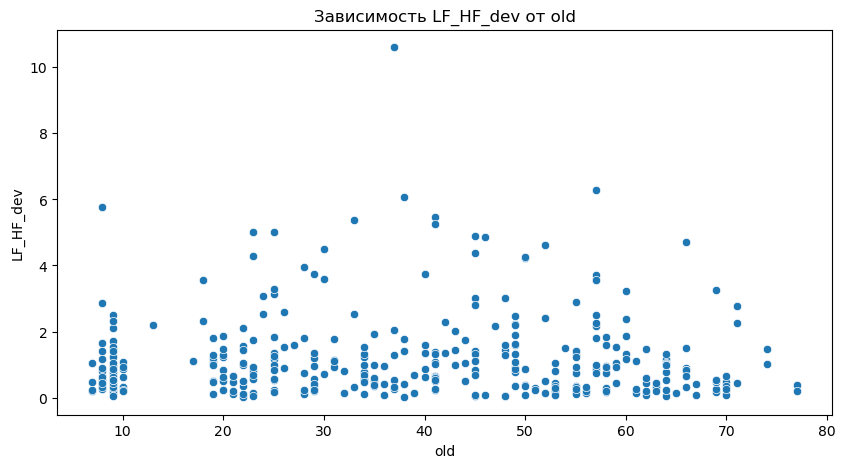

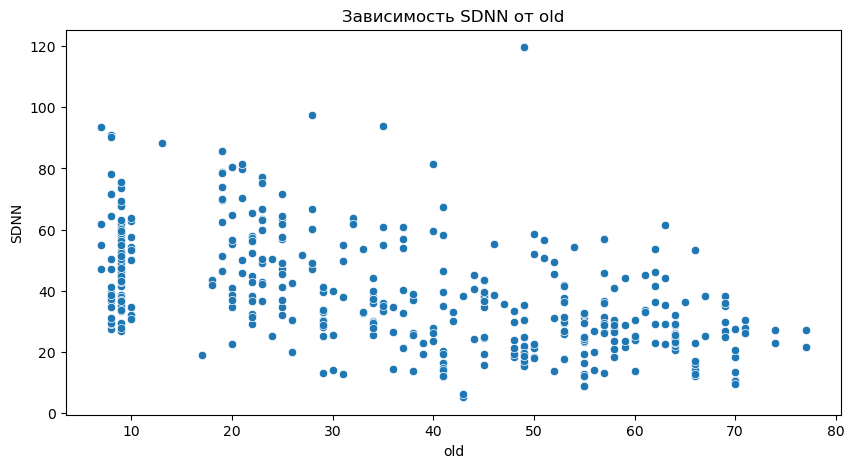

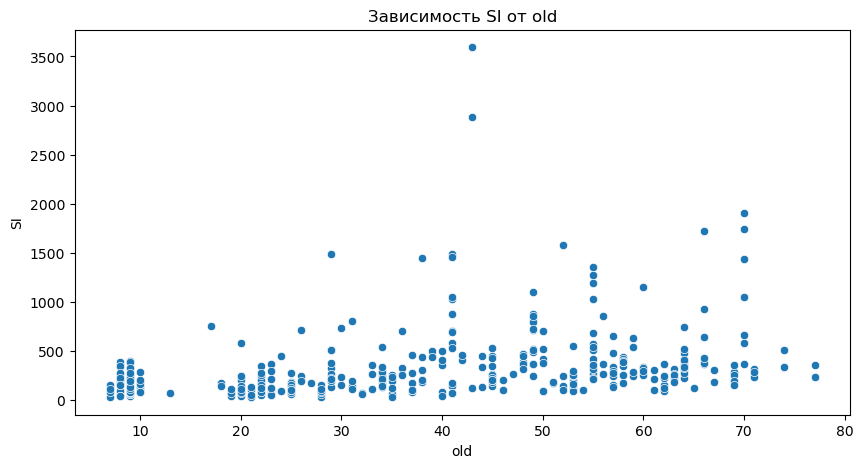

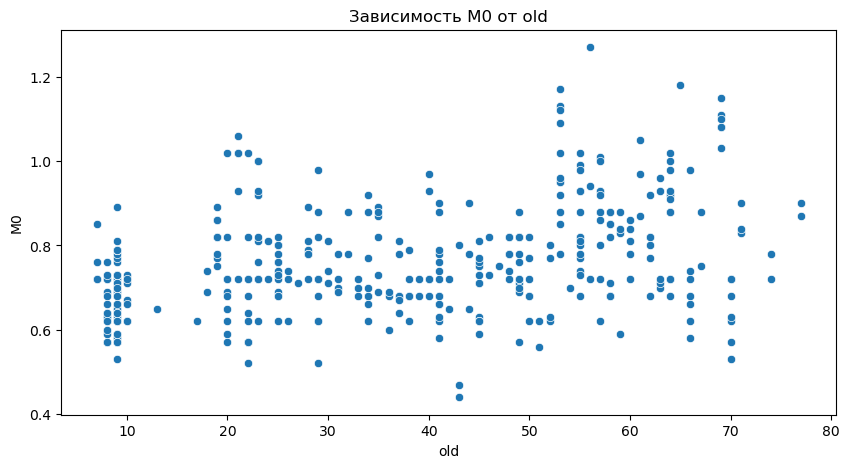

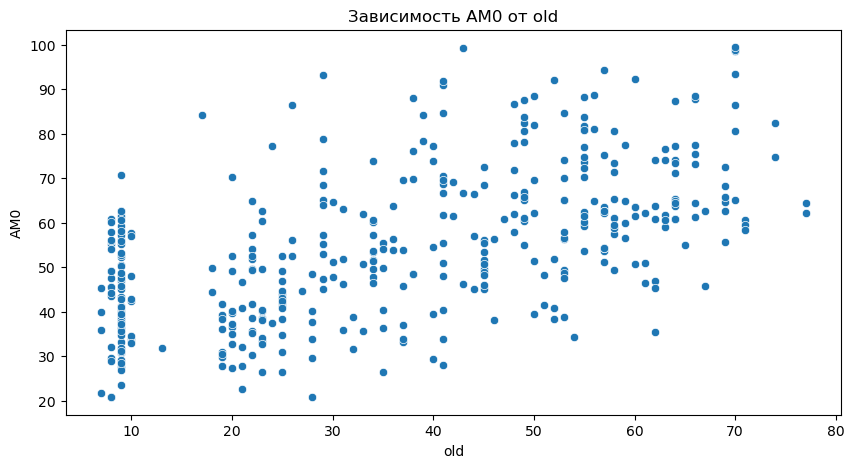

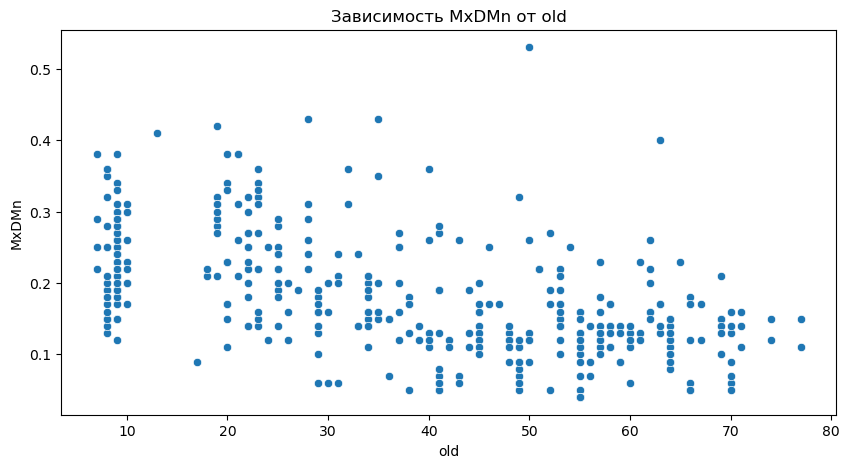

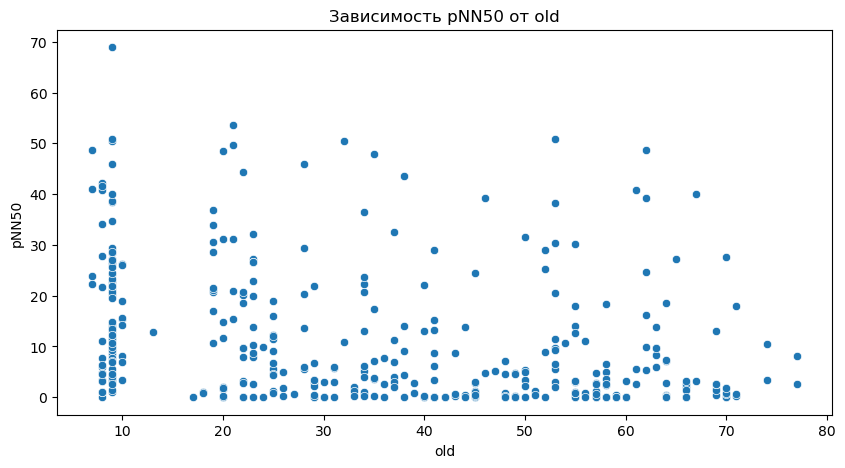

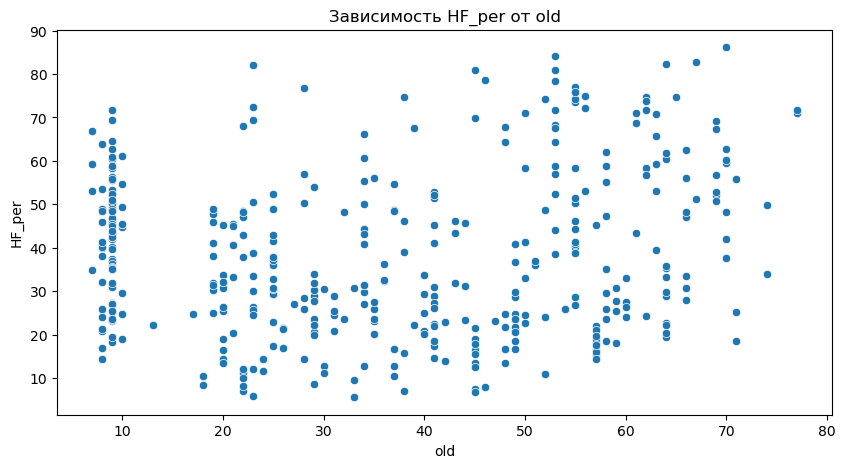

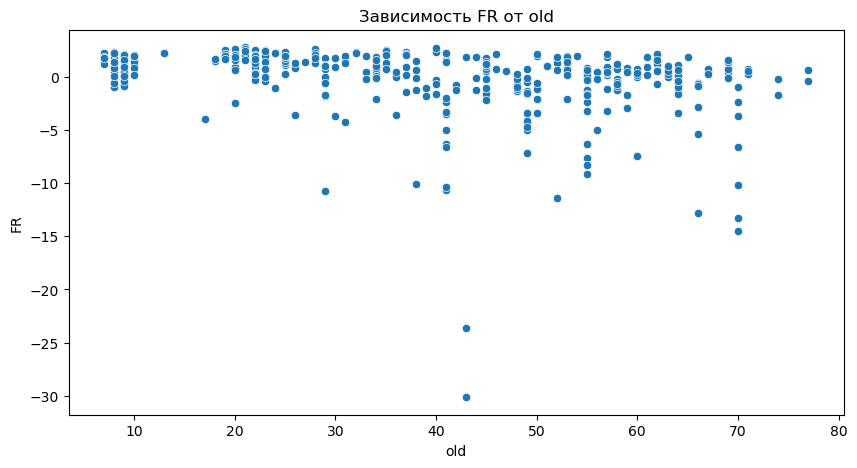

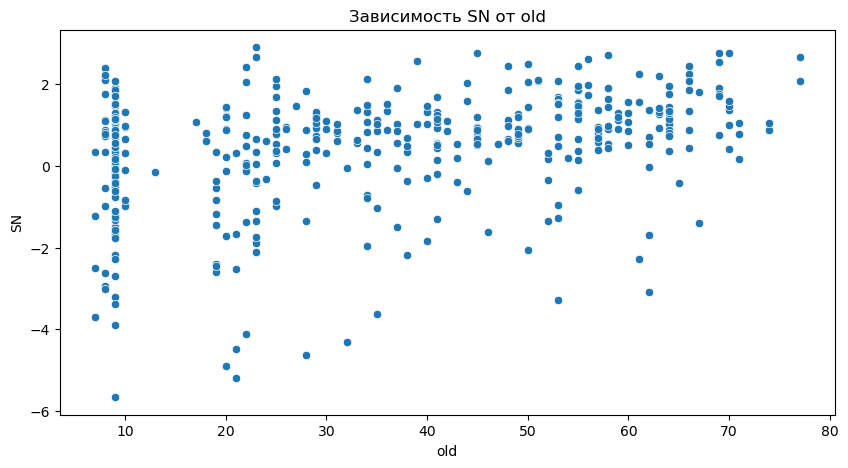

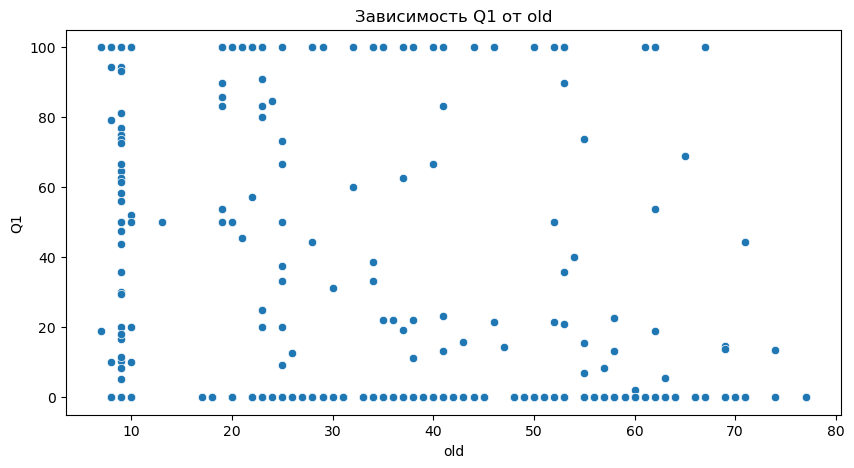

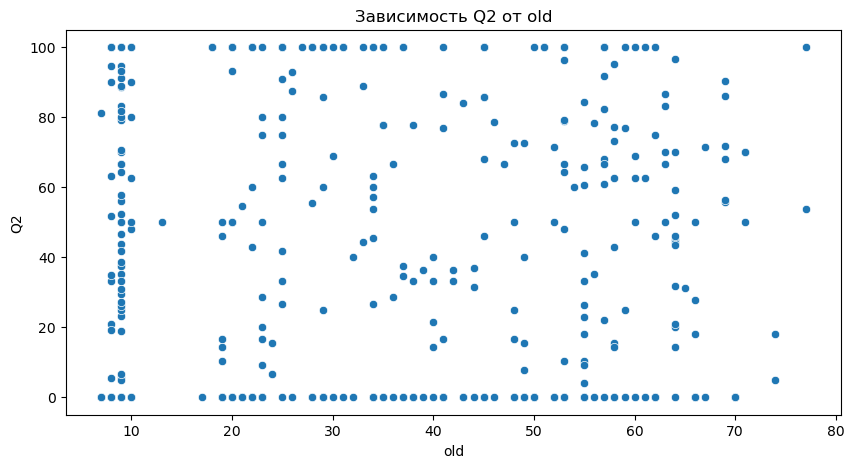

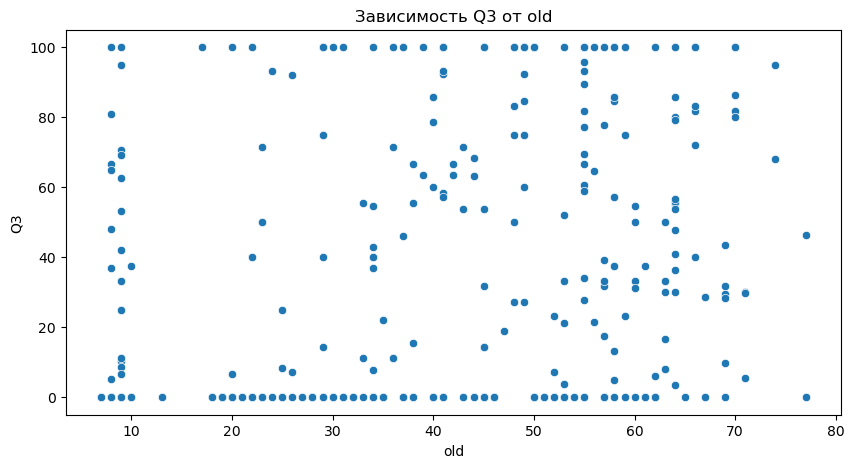

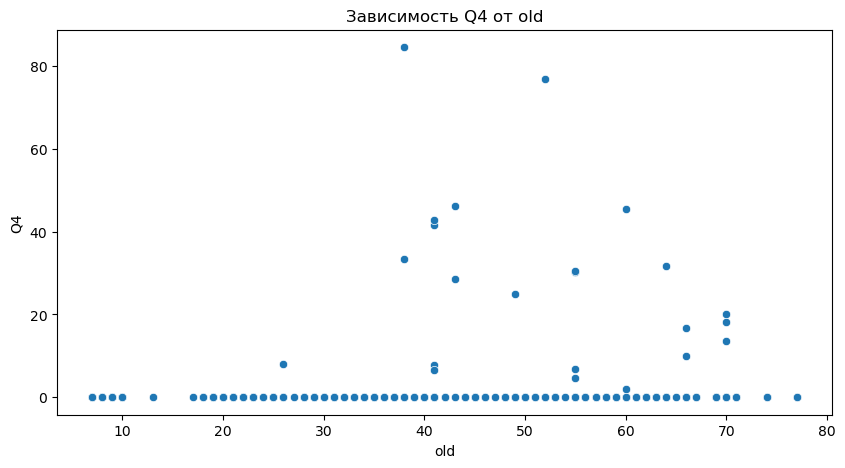

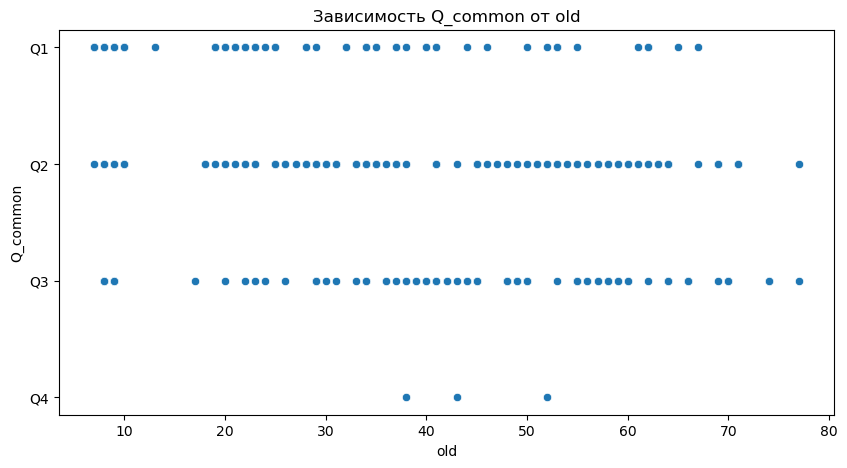

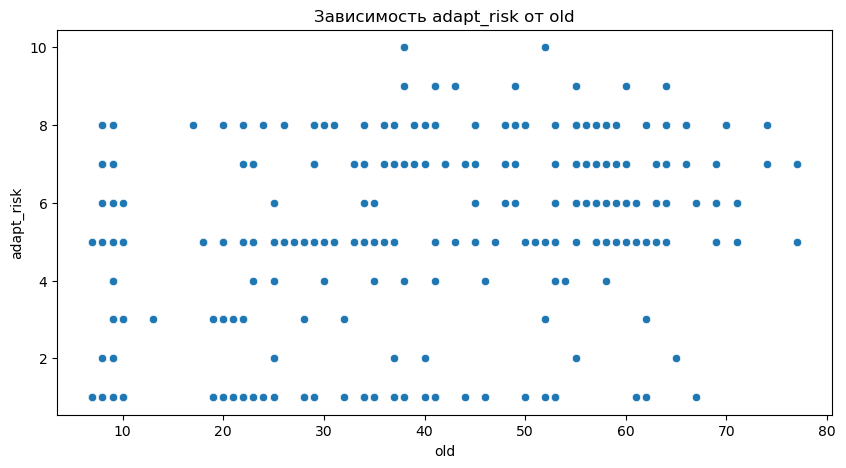

In [70]:
particular_column = 'old';
for i in range(4,len(data.columns)-1):
    if data.columns[i] != particular_column:
        plt.figure(figsize=(10,5))
        sns.scatterplot(x=data['old'], y=data[data.columns[i]])
        plt.title(f'Зависимость {data.columns[i]} от {particular_column}')


Создание общей таблицы с кореляциями (Кендала,Пирсона, Спирмана). Используется skipy


In [71]:
columns = ['Показатель', 'Корреляция Пирсона', 'Pearson p-value', 
           'Корреляция Спирмана', 'Spearman p-value', 'Корреляция Кендалла', 'Kendall p-value', 'Mae', 'Тип данных']
data[particular_column] = pd.to_numeric(data[particular_column]) #преобразование данных столбца old в числовые
general_table = pd.DataFrame(columns=columns) #создание таблицы


for i in range (9, len(data.columns)-1):
    if data.columns[i] != 'Q_common':
        
        data[data.columns[i]] = pd.to_numeric(data[data.columns[i]])#преобразование данных колонки в числовые
        
        Pearson,Pear_p = pearsonr(data[particular_column], data[data.columns[i]])
        Spearman,Spear_p = spearmanr(data[particular_column], data[data.columns[i]])
        Kendall,Ken_p = kendalltau(data[particular_column], data[data.columns[i]])
        Mae = mean_absolute_error(data[particular_column], data[data.columns[i]])
        
        general_table.loc[i-9] = [data.columns[i], Pearson, Pear_p, Spearman, Spear_p, Kendall, Ken_p, Mae, 'continious']#добавление 
        #новой записи в таблицу

discret = ['mono_err','color_err','true_text_err','true_color_err','adapt_risk'] #список показателей с типом данных discret
general_table.loc[general_table['Показатель'].isin(discret), 'Тип данных'] = 'discret' #изменение типа данных на discret у этих показателей
        
pd.set_option('display.width', 130) #установка ширины таблицы в символах

print(general_table)


         Показатель  Корреляция Пирсона  Pearson p-value  Корреляция Спирмана  Spearman p-value  Корреляция Кендалла  \
0   stroop_duration            0.310436     8.211601e-11             0.232098      1.567254e-06             0.157843   
1            mono_t            0.270046     1.955779e-08             0.225177      3.233218e-06             0.153322   
2           mono_dt            0.310287     8.391980e-11             0.245733      3.518542e-07             0.158597   
3          mono_err            0.069861     1.534404e-01             0.079375      1.047041e-01             0.062683   
4           color_t            0.249815     2.210867e-07             0.211661      1.246789e-05             0.148841   
5          color_dt            0.235618     1.074883e-06             0.168509      5.326194e-04             0.110565   
6         color_err            0.063702     1.931271e-01             0.030049      5.396143e-01             0.023084   
7       true_text_t            0.216497 

Создание таблицы с кореляциями (Кендала,Пирсона, Спирмана) для мужчин. Используется skipy


In [83]:
men_table = pd.DataFrame(columns=columns) #создание таблицы для мужчин
men_data=data[data['gender']=='М'].copy()# создание таблицы с данными только мужчин cope чтоб не изменялась data и не было предупреждений

for i in range (9, len(men_data.columns)-1):
    if men_data.columns[i] != 'Q_common':
        
        men_data[men_data.columns[i]] = pd.to_numeric(men_data[men_data.columns[i]])#преобразование данных колонки в числовые
        
        Pearson,Pear_p = pearsonr(men_data[particular_column], men_data[men_data.columns[i]])
        Spearman,Spear_p = spearmanr(men_data[particular_column], men_data[men_data.columns[i]])
        Kendall,Ken_p = kendalltau(men_data[particular_column], men_data[men_data.columns[i]])
        Mae = mean_absolute_error(men_data[particular_column], men_data[men_data.columns[i]])
        
        men_table.loc[i-9] = [men_data.columns[i], Pearson, Pear_p, Spearman, Spear_p, Kendall, Ken_p, Mae, 'continious']
        #добавление новой записи в таблицу

discret = ['mono_err','color_err','true_text_err','true_color_err','adapt_risk'] #список показателей с типом данных discret
men_table.loc[men_table['Показатель'].isin(discret), 'Тип данных'] = 'discret' #изменение типа данных на discret у этих показателей
        
pd.set_option('display.width', 130) #установка ширины таблицы в символах
print(men_table)

         Показатель  Корреляция Пирсона  Pearson p-value  Корреляция Спирмана  Spearman p-value  Корреляция Кендалла  \
0   stroop_duration            0.262639     1.221234e-04             0.161693      1.933775e-02             0.090274   
1            mono_t            0.247103     3.097508e-04             0.161100      1.979188e-02             0.099712   
2           mono_dt            0.323477     1.775086e-06             0.234179      6.430778e-04             0.146492   
3          mono_err           -0.010687     8.779425e-01             0.060480      3.843504e-01             0.050436   
4           color_t            0.199814     3.723821e-03             0.100971      1.457577e-01             0.062952   
5          color_dt            0.218645     1.470058e-03             0.090812      1.909814e-01             0.049525   
6         color_err           -0.048943     4.815910e-01            -0.040572      5.597122e-01            -0.031765   
7       true_text_t            0.172312 

In [ ]:
Создание таблицы с кореляциями (Кендала,Пирсона, Спирмана) для женщин. Используется skipy

In [84]:
women_table = pd.DataFrame(columns=columns) #создание таблицы для женцин
women_data=data[data['gender']=='Ж'].copy()# создание таблицы с данными только мужчин cope чтоб не изменялась data и не было предупреждений

for i in range (9, len(women_data.columns)-1):
    if women_data.columns[i] != 'Q_common':
        
        women_data[women_data.columns[i]] = pd.to_numeric(women_data[women_data.columns[i]])#преобразование данных колонки в числовые
        
        Pearson,Pear_p = pearsonr(women_data[particular_column], women_data[women_data.columns[i]])
        Spearman,Spear_p = spearmanr(women_data[particular_column], women_data[women_data.columns[i]])
        Kendall,Ken_p = kendalltau(women_data[particular_column], women_data[women_data.columns[i]])
        Mae = mean_absolute_error(women_data[particular_column], women_data[women_data.columns[i]])
        
        women_table.loc[i-9] = [women_data.columns[i], Pearson, Pear_p, Spearman, Spear_p, Kendall, Ken_p, Mae, 'continious']
        #добавление новой записи в таблицу

discret = ['mono_err','color_err','true_text_err','true_color_err','adapt_risk'] #список показателей с типом данных discret
women_table.loc[women_table['Показатель'].isin(discret), 'Тип данных'] = 'discret' #изменение типа данных на discret у этих показателей
        
pd.set_option('display.width', 130) #установка ширины таблицы в символах
print(women_table)

         Показатель  Корреляция Пирсона  Pearson p-value  Корреляция Спирмана  Spearman p-value  Корреляция Кендалла  \
0   stroop_duration            0.460316     2.074495e-12             0.378174      1.521485e-08             0.273048   
1            mono_t            0.363049     6.108507e-08             0.345525      2.801750e-07             0.239138   
2           mono_dt            0.316849     2.793238e-06             0.296737      1.223398e-05             0.199550   
3          mono_err            0.167003     1.540547e-02             0.129972      6.007841e-02             0.105683   
4           color_t            0.401578     1.532554e-09             0.392336      3.876206e-09             0.274966   
5          color_dt            0.316072     2.963285e-06             0.291573      1.756866e-05             0.207528   
6         color_err            0.189646     5.835447e-03             0.121419      7.916884e-02             0.098907   
7       true_text_t            0.362402 